In [157]:
import pandas as pd
import numpy as np

# Read data

In [186]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [187]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0,NaN,S


# concat train and test
왜 합쳐줘야 하나요?

In [188]:
train_drop_Survived = train.drop('Survived', axis=1)

In [189]:
train_drop_Survived['tag'] = 'train'
test['tag'] = 'test'

In [190]:
df = pd.concat([train_drop_Survived, test])

In [191]:
# Age, Fare에 null 값이 있네요. Age에는 빈 값들이 많고, Fare는 딱 하나 비어있어요.
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
tag               0
dtype: int64

### Fare가 null 인 것을 index로 찾아볼까요?

In [164]:

df.loc[df['Fare'].isnull(), :]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


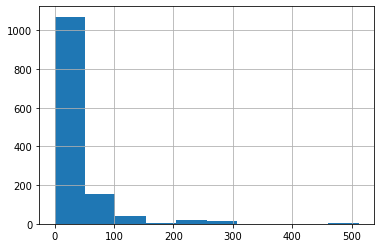

In [165]:
%matplotlib inline
df['Fare'].hist()

In [166]:
df.groupby('Pclass')['Fare'].median()[3]
# pclasee별로 중앙값을 찾아서 넣으면 더 정확할거 같다~! (fare와 비례하니까)

8.05

### Q. 비어있는 Fare 데이터를 적당한 값을 채워넣어 주세요.

In [167]:
# Answer
df.loc[df['Fare'].isnull(), 'Fare'] = df.groupby('Pclass')['Fare'].median()[3]

In [168]:
df.loc[152,:]
# 6.05 세 -> 8.05로 잘 들어가고 있음
# 데이터가 왜 2개지? ,train, test 합친거라서 2개! 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
152,153,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.05,NaN,S,train
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S,test


### Q. 비어있는 Age 데이터를 적당한 값으로 채워넣어 주세요.

방법 1. 전체 데이터의 평균, 중앙, 최빈 중에 하나로 채워넣어준다.

In [192]:
df['Age'].isnull().sum()

263

In [170]:
df.loc[df['Age'].isnull(), :].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,train
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,train
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,train
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,train


In [193]:
df['Age'].median()

28.0

In [194]:
df['Age_v1'] = df['Age'].fillna(np.mean(df['Age'])) #평균
# age null 계속 보고 싶을 땐, 버전 1 만들어서 새롭게 저장해줌 

In [173]:
# df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()
# 혜민님 코드는 fillna 씀 (평균 넣으심)
# df['Age'] = df['Age'].fillna(np.mean(df['Age']))
# 보민님 코드 최빈값
# df.loc[df['Age'].isnull(), 'Age'] = df['Age'].dropna().mode()[0]

In [195]:
df.loc[5,:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag,Age_v1
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train,29.881138
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,test,14.000000


방법 2-1. 다른 변수들을 1개를 활용해 그룹 별 평균, 중앙, 최빈값들로 넣어준다.   
예를 들어, Pclass별로 Age가 눈에 띄게 다른 것을 발견했다면 Pclass별 평균 또는 중앙값으로 null 값들을 대체해준다.

In [196]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

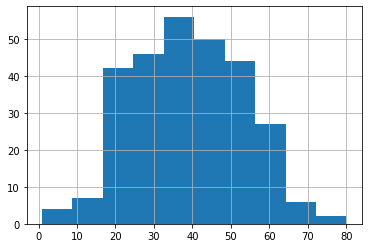

In [197]:
df[df['Pclass']==1]['Age'].hist()

In [198]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [199]:
df.groupby('SibSp')['Age'].mean()

SibSp
0    30.921766
1    31.058071
2    23.569444
3    16.312500
4     8.772727
5    10.166667
8    14.500000
Name: Age, dtype: float64

In [200]:
# 혜민님 코드 
df['Age_v2'] = df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
# transform 이 apply 다른 점? 
# - aplly는 x를 꺼내서 반복적으로 age에다가 연산을 해주는 건데 (1을 더한다던가 ) 그냥 apply 컬럼을 돌아가면서 조건을 줘서 연산을 해주는 거고
# transform은 우리가 groupby 해놓은 것의 특성을 이해하고 싶을 때 사용하면 됨 
# apply로도 할 수 있음 

In [207]:
# 선미님이 준비한 풀이 
df_groupby_age = df.groupby(['Pclass'])['Age'].median().reset_index()
df_v2 = df.merge(df_groupby_age, on = 'Pclass')
df_v2['Age_v3'].fillna(df_v2['Age_y'])

0       22.000000
1       26.000000
2       35.000000
3       25.962264
4        2.000000
          ...    
1304    57.000000
1305    47.000000
1306    38.000000
1307    20.000000
1308    23.000000
Name: Age_v3, Length: 1309, dtype: float64

In [208]:
# 여러 칼럼에 적용할 수도 있음
df['Age_v4'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x:x.fillna(x.median()))

In [209]:
# 재민님 풀이
# for n in range(1,4):
#     df.loc[(df['Pclass'] == n) & (df['Age'].isnull()), 'Age'] = df.groupby('Pclass')['Age'].median()[n]

In [ ]:
ages_mode = df.groupby(['Pclass', 'Sex'])['Age'].agg(lambda x: x.value_counts().index[0])
ages_mode = pd.DataFrame(ages_mode)
ages_mode

방법 2-2. 다른 변수들을 2개 이상을 활용해 그룹 별 평균, 중앙, 최빈값들로 넣어준다.
예를 들어 티켓의 클래스, 승선 항구 별로 Age가 다르다는 것을 발견했다면 Pclass, Embarked의 조합 그룹 별 평균 또는 중앙값으로 null 값들을 대체해준다.

In [ ]:
df.head(1)

방법 3. 회귀 분석으로 null 값들을 예측한다.

In [210]:
# Answer
# survied 컬럼이 있는 걸로 train을 해서 예측해서 test로 넣어줘야 함.
# 근데 지금은 age를 알고싶은 거니까, 하나는 age 컬럼을 traind으로 저장하고 하나는 age 컬럼이 없는 걸 test로 저장해서 다시해야함. 
# 지금은 df로 합쳐져 있으니까, 
test =df[df['Age'].isnull()] # 이렇게 나눠주기 
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          240
Embarked         0
tag              0
Age_v1           0
Age_v2           0
Age_v3           0
Age_v4           0
dtype: int64

In [ ]:
train = df

In [ ]:
train.head(1)

In [ ]:
df['Age'].hist()
# 중앙값하고 평균하고 큰 차이가 없어서 둘 중 아무거나 써도 됨. (정규분포 같은 모습)
# 보통은 둘 다 해봄! 

### Q. Cabin, Embarked 컬럼의 경우에는 어떻게 해주면 좋을까요?

In [ ]:
# Answer

### 사용할 컬럼들에 null 값이 없는지 최종적으로 확인하세요.

In [ ]:
# Answer

# 작업물을 저장하세요.

In [ ]:
# Answer